In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [58]:
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.decomposition import PCA
train = pd.read_csv('../input/digit-recognizer/train.csv')
test  = pd.read_csv('../input/digit-recognizer/test.csv')
label = train["label"]
train = train.drop("label",1)

In [59]:
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


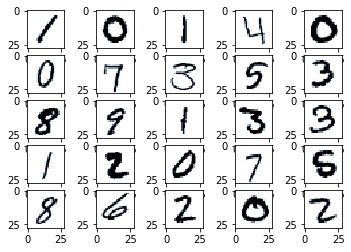

In [60]:
# show some of the numbers
plt.figure()
for i in range(0,25):
    plt.subplot(5,5,i+1)
    grid_data = train.iloc[[i]].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")


In [61]:
#see data distribution
print(label.value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [62]:
from datetime import datetime
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
#scale training and test set
ss=StandardScaler()
ss_train=ss.fit_transform(train)
ss_test=ss.transform(test)

In [63]:
label=label.values

In [64]:
#Neural Network: 2 hidden layers 40 node each
model1 = keras.Sequential([keras.layers.Dense(128, activation='relu'),
                           keras.layers.Dense(40, activation='relu'),
                           keras.layers.Dense(40, activation='relu'),
                           keras.layers.Dense(10, activation='softmax')
])
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#fit the model and count training time
start=datetime.now()
model1.fit(ss_train, label, epochs=5)
end=datetime.now()
time1=end-start
print('Time1=',time1)


Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 4s 85us/sample - loss: 1.5677 - accuracy: 0.8997
Epoch 2/5
42000/42000 [==============================] - 3s 72us/sample - loss: 1.5170 - accuracy: 0.9452
Epoch 3/5
42000/42000 [==============================] - 3s 72us/sample - loss: 1.5081 - accuracy: 0.9534
Epoch 4/5
42000/42000 [==============================] - 3s 71us/sample - loss: 1.5045 - accuracy: 0.9568
Epoch 5/5
42000/42000 [==============================] - 3s 70us/sample - loss: 1.5003 - accuracy: 0.9607
Time1= 0:00:16.188594


In [75]:
#Neural Network: 2 layers 20 node each
model2 = keras.Sequential([keras.layers.Dense(128, activation='relu'),
                           keras.layers.Dense(20, activation='relu'),
                           keras.layers.Dense(20, activation='relu'),
                           keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#fit the model and count training time
start=datetime.now()
model2.fit(ss_train, label, epochs=5)
end=datetime.now()
time2=end-start
print('Time2=',time2)


Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 3s 79us/sample - loss: 1.5826 - accuracy: 0.8866
Epoch 2/5
42000/42000 [==============================] - 3s 70us/sample - loss: 1.5161 - accuracy: 0.9469
Epoch 3/5
42000/42000 [==============================] - 3s 70us/sample - loss: 1.5057 - accuracy: 0.9564
Epoch 4/5
42000/42000 [==============================] - 3s 70us/sample - loss: 1.5005 - accuracy: 0.9609
Epoch 5/5
42000/42000 [==============================] - 3s 70us/sample - loss: 1.4975 - accuracy: 0.9639
Time2= 0:00:15.579537


In [66]:
#Neural Network: 4 layers 40 node each
model3 = keras.Sequential([keras.layers.Dense(128, activation='relu'),
                           keras.layers.Dense(40, activation='relu'),
                           keras.layers.Dense(40, activation='relu'),
                           keras.layers.Dense(40, activation='relu'),
                           keras.layers.Dense(40, activation='relu'),
                           keras.layers.Dense(10, activation='softmax')
])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#fit the model and count training time
start=datetime.now()
model3.fit(ss_train, label, epochs=5)
end=datetime.now()
time3=end-start
print('Time3=',time3)

Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 4s 87us/sample - loss: 1.5795 - accuracy: 0.8873
Epoch 2/5
42000/42000 [==============================] - 3s 76us/sample - loss: 1.5265 - accuracy: 0.9347
Epoch 3/5
42000/42000 [==============================] - 3s 76us/sample - loss: 1.5196 - accuracy: 0.9414
Epoch 4/5
42000/42000 [==============================] - 3s 75us/sample - loss: 1.5141 - accuracy: 0.9467
Epoch 5/5
42000/42000 [==============================] - 3s 75us/sample - loss: 1.5102 - accuracy: 0.9510
Time3= 0:00:16.975116


In [67]:
#Neural Network: 4 layers 20 node each
model4 = keras.Sequential([keras.layers.Dense(128, activation='relu'),
                           keras.layers.Dense(20, activation='relu'),
                           keras.layers.Dense(20, activation='relu'),
                           keras.layers.Dense(20, activation='relu'),
                           keras.layers.Dense(20, activation='relu'),
                           keras.layers.Dense(10, activation='softmax')
])
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#fit the model and count training time
start=datetime.now()
model4.fit(ss_train, label, epochs=5)
end=datetime.now()
time4=end-start
print('Time4=',time4)

Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 3s 83us/sample - loss: 1.6613 - accuracy: 0.8051
Epoch 2/5
42000/42000 [==============================] - 3s 73us/sample - loss: 1.6049 - accuracy: 0.8559
Epoch 3/5
42000/42000 [==============================] - 3s 76us/sample - loss: 1.5988 - accuracy: 0.8620
Epoch 4/5
42000/42000 [==============================] - 3s 76us/sample - loss: 1.5655 - accuracy: 0.8954
Epoch 5/5
42000/42000 [==============================] - 3s 74us/sample - loss: 1.5108 - accuracy: 0.9507
Time4= 0:00:16.619186


In [69]:
#now make predictions using normalized testset
def prediction (model):
    pred=model.predict(ss_test)
    result=[]
    for i in pred:
        result.append(np.argmax(i))
    return result



In [70]:
pred1=prediction(model1)

In [71]:
pred2=prediction(model2)
pred3=prediction(model3)
pred4=prediction(model4)

In [72]:
#export
for filename, file in zip(['DNN1.csv','DNN2.csv','DNN3.csv','DNN4.csv'],[pred1,pred2,pred3,pred4]):
    np.savetxt(filename, 
           np.c_[range(1,len(test)+1),file], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')


In [73]:
'''
Scores for 
1(2*40):0.95071
2(2*20):0.95300
3(4*40):0.93285
4(4*20):0.93585
'''

'\nScores for \n1(2*40):0.95071\n2(2*20):0.95300\n3(4*40):0.93285\n4(4*20):0.93585\n'

In [3]:
summary = pd.read_csv('summary.csv')
summary

,Hidden Layers,Nodes per layer,Training time,Accuracy(train),Accuracy(test)
0,2,40,16.19,0.9607,0.9507
1,2,20,15.58,0.9636,0.9530
2,4,40,16.98,0.9510,0.9329
3,4,20,16.62,0.9507,0.9359
